# Homework 2

In this assignment we will use data about the price of housing vs lot size

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd /content/drive/MyDrive/Intro to DS lecture/HW2

/content/drive/MyDrive/Intro to DS lecture/HW2


In [5]:

# import python packages
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import pandas as pd


In [6]:

# Load CSV and columns
df = pd.read_csv("Housing.csv")

# extract price and lotsize columns
Y = df['price']
X = df['lotsize']

# convert to numpy arrays, specifically column vectors with shape(N,1) 
Y = np.array(Y)
X = np.array(X)
# shuffle the data
np.random.seed(0)
inds_shuffle = np.random.permutation(len(Y))
X = X[inds_shuffle]
Y = Y[inds_shuffle]

# reshape to column vectors
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

# print the shapes of X and Y
print(X.shape)
print(Y.shape)



(546, 1)
(546, 1)


[2pts] Create new numpy arrays (column) called X_train, X_test, Y_train, and Y_test, where the training dataset contains the first 80% of samples (rounding sample index down) and the testing dataset contains the last 20% of samples. Use print statements to print the shape of thre training and testing datasets


In [10]:
X_train = X[0:436] #take 80%
Y_train = Y[0:436]
X_test = X[436:]
Y_test = Y[436:]
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(436, 1)
(436, 1)
(110, 1)
(110, 1)


[2pts] Make a scatterplot of the training and testing data (Hint: plt.scatter). The x-coordinate should be the lot size, X, and the y-coordinate should be the price, Y. Use point markers with different shapes and colors to show to training and testing datasets. Include x axis labels, y axis labels, a title, and a legend.

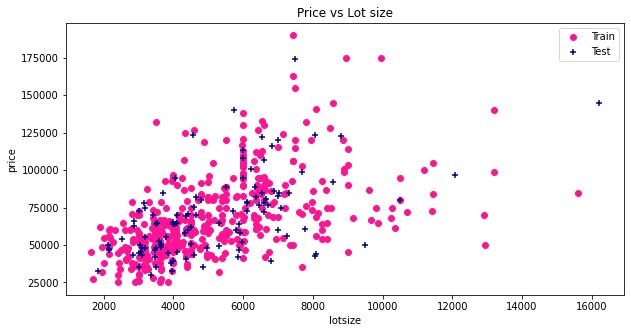

In [18]:
plt.figure(figsize=(10,5))
plt.title('Price vs Lot size')
plt.xlabel('lotsize')
plt.ylabel('price')
plt.scatter(X_train, Y_train, c='deeppink', marker = 'o')
plt.scatter(X_test, Y_test, c='darkblue', marker = '+')
plt.legend(['Train','Test'])
plt.show()

[3pts] Without using sklearn or other packages, implement least squared linear regression to fit a line to the training data using the linear model, $Y=a^T X + b$, where $a$ is a vector of weight coefficients for each feature and $b$ is a scalar offset. (Hint: Augment the data with an additional feature with constant value of ones to handle the offset, Hint: your solution should use np.linalg.inv) Use your fitted model to make a prediction about the Y_test values given X_test values. Name the predicted values of Y_test_pred_custom. Using the same fitted model, repeat the prediction for training inputs, X_train, and name that ouput Y_train_pred_custom.

In [56]:
aug_X = np.hstack((np.ones([X_train.shape[0], 1]), X_train))#custom linear reg
aug_X_test = np.hstack((np.ones([X_test.shape[0], 1]), X_test))
Xpinv = np.linalg.inv(aug_X.T @ aug_X) @ aug_X.T 
bHat = Xpinv @ Y_train
display(bHat)
Y_test_pred_custom = aug_X_test @ bHat
Y_train_pred_custom = aug_X @ bHat

array([[3.43022672e+04],
       [6.54367812e+00]])

In [54]:
Xpinv = np.linalg.inv(X_train.T @ X_train) @ X_train.T #wrong one
bHat = Xpinv @ Y_train
Y_test_pred_custom = X_test @ bHat
Y_train_pred_custom = X_train @ bHat

[3pts] Use sklearn.linear_model.LinearRegression() to fit a linear model to the training data.  Use your fitted model to make a prediction about the Y_test values given X_test values. Name the predicted values of Y_test_pred_sklearn. Using the same fitted model, repeat the prediction for training inputs, X_train, and name that ouput Y_train_pred_sklearn.

In [38]:
reg = linear_model.LinearRegression().fit(X_train, Y_train)#sklearn
Y_test_pred_sklearn = reg.predict(X_test)
Y_train_pred_sklearn = reg.predict(X_train)
display(np.append(reg.intercept_, reg.coef_))

array([3.43022672e+04, 6.54367812e+00])

[2pts] repeat the scatter plot from the previous secton but add a plot of the predicted values from the fitted models. 

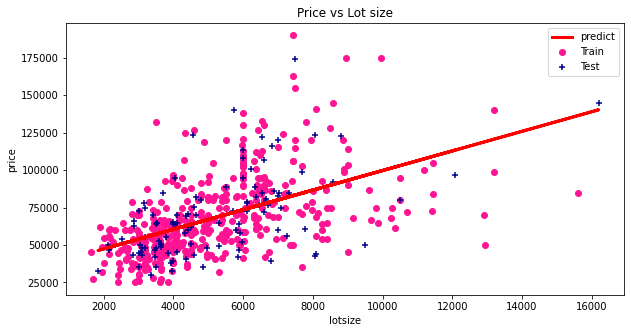

In [34]:
plt.figure(figsize=(10,5))#plot
plt.title('Price vs Lot size')
plt.xlabel('lotsize')
plt.ylabel('price')
plt.scatter(X_train, Y_train, c='deeppink', marker = 'o')
plt.scatter(X_test, Y_test, c='darkblue', marker = '+')
plt.plot(X_test ,Y_test_pred_sklearn ,color='red',linewidth =3)
plt.legend(['Predict','Train','Test'])
#plt.plot(X_test ,Y_test_pred_sklearn ,color='red',linewidth =3)
plt.show()

[2pt] Compute the residual between predicted values from the custom linear model and the actual values of Y for both the training and testing dataset using the previously computed values Y_test_pred_custom and Y_train_pred_custom. Plot two histograms for the training and testing residuals. Are the shapes roughly similar? Provide a written explanation about what the impact of over-fitting would look like in these plots. 

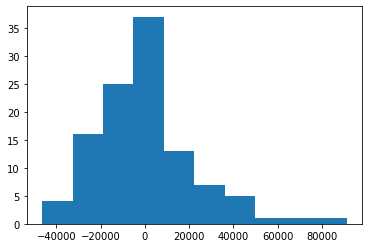

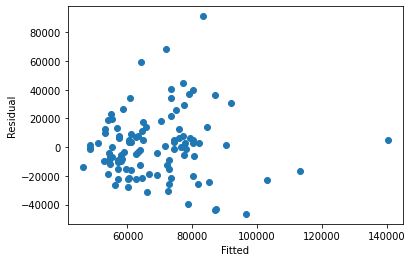

In [57]:
#first historgrams of Ytest
plt.hist(Y_test - Y_test_pred_custom)
plt.show()

plt.scatter(Y_test_pred_custom, Y_test - Y_test_pred_custom)
plt.xlabel("Fitted")
plt.ylabel("Residual")
plt.show()


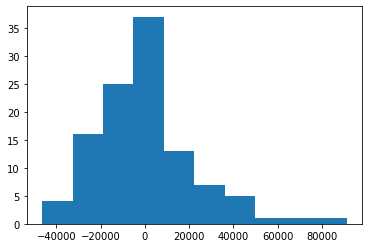

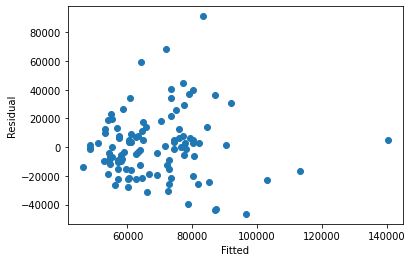

In [50]:
#compare with Y_test_pred_sklearn
plt.hist(Y_test - Y_test_pred_sklearn)
plt.show()

plt.scatter(Y_test_pred_sklearn, Y_test - Y_test_pred_sklearn)
plt.xlabel("Fitted")
plt.ylabel("Residual")
plt.show()

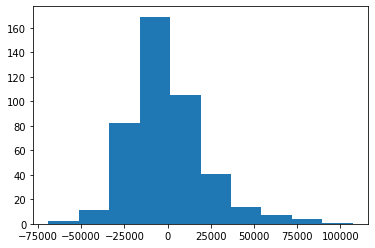

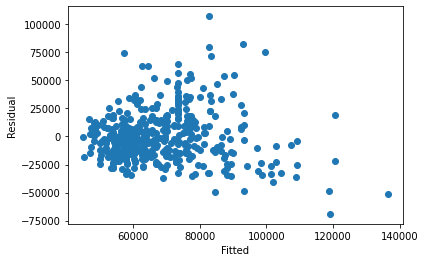

In [58]:
#second historgrams of Y_train
plt.hist(Y_train - Y_train_pred_custom)
plt.show()

plt.scatter(Y_train_pred_custom, Y_train - Y_train_pred_custom)
plt.xlabel("Fitted")
plt.ylabel("Residual")
plt.show()

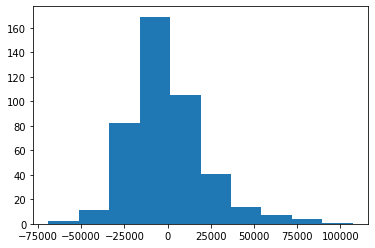

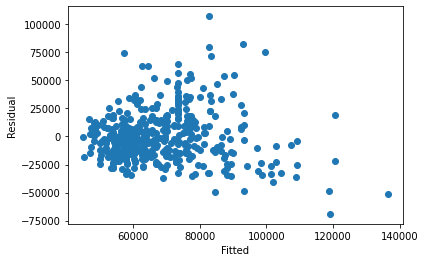

In [59]:
#compare with Y_train_pred_sklearn
plt.hist(Y_train - Y_train_pred_sklearn)
plt.show()

plt.scatter(Y_train_pred_sklearn, Y_train - Y_train_pred_sklearn)
plt.xlabel("Fitted")
plt.ylabel("Residual")
plt.show()

Answer: Roughly similar!  
Explanation: Although it is roughly similar, we can see that the model is obviously different from the training set and the test set when we look carefully. This is also a big problem with linear regression, where the fitted predictions fit well on the training set but poorly on the test set. This is the impact of the overfitting problem on these two graphs and the lack of generalization ability of the model reflected. This is because the model is too complex to learn noise, not regularity. Among them, the small amount of data and the assumption that the model is too complex will both cause overfitting.